<a href="https://colab.research.google.com/github/mjmousavi97/Deep-Learning-Tehran-uni/blob/main/HomeWorks/03%20HW/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader
from PIL import Image
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from timeit import default_timer as timer

In [5]:
# Define a transformation pipeline for preprocessing images
transform = transforms.Compose(
    [
        # 1. Convert the input image (PIL Image or NumPy array) into a PyTorch tensor.
        #    - Converts pixel values from range [0, 255] to [0.0, 1.0].
        transforms.ToTensor(),

        # 2. Randomly flip the image horizontally with probability 0.5.
        #    - Useful for data augmentation to improve model generalization.
        transforms.RandomHorizontalFlip(p=0.5),

        # 3. Normalize the image tensor using mean=0.5 and std=0.5.
        #    - Formula: (x - mean) / std
        #    - This maps values from [0.0, 1.0] to [-1.0, 1.0].
        transforms.Normalize((0.5,), (0.5,))
    ]
)

"""
Docstring:
----------
This transformation pipeline is designed for preprocessing image data
before feeding it into a neural network.

Steps applied to each image:
1. Convert the image to a tensor with values in [0,1].
2. Apply a random horizontal flip with probability 0.5
   (data augmentation).
3. Normalize the tensor so that pixel values fall in [-1,1].

Typical use case: applied to image datasets (e.g., MNIST, CIFAR-10)
to improve training stability and generalization.
"""

'\nDocstring:\n----------\nThis transformation pipeline is designed for preprocessing image data \nbefore feeding it into a neural network.\n\nSteps applied to each image:\n1. Convert the image to a tensor with values in [0,1].\n2. Apply a random horizontal flip with probability 0.5 \n   (data augmentation).\n3. Normalize the tensor so that pixel values fall in [-1,1].\n\nTypical use case: applied to image datasets (e.g., MNIST, CIFAR-10)\nto improve training stability and generalization.\n'

In [6]:
# Load the FashionMNIST training dataset
train_dataset_FashionMNIST = torchvision.datasets.FashionMNIST(
    root="data",          # Directory where the dataset will be stored/downloaded
    train=True,           # True = load the training split (60,000 images)
    download=True,        # Download the dataset if it's not already on disk
    transform=transform   # Apply preprocessing pipeline (ToTensor, augmentation, normalization)
)

# Load the FashionMNIST test dataset
test_dataset_FashionMNIST = torchvision.datasets.FashionMNIST(
    root="data",          # Same directory used for training dataset
    train=False,          # False = load the test split (10,000 images)
    download=True,        # Download if not already present
    transform=transform   # Apply the same preprocessing pipeline as training
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.75MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.59MB/s]


In [7]:
# Load the MNIST training dataset
train_dataset_MNIST = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

# Load the MNIST test dataset
test_dataset_MNIST = torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 456kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.79MB/s]


In [8]:
# Load the CIFAR10 training dataset
train_dataset_CIFAR10 = torchvision.datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform
)

# Load the CIFAR10 test dataset
test_dataset_CIFAR10 = torchvision.datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform
)


100%|██████████| 170M/170M [00:05<00:00, 29.0MB/s]


In [13]:
def create_dataloader(train_raw_dataset, test_raw_dataset, batch_size):
    """
    Create PyTorch DataLoaders for training and testing datasets.

    Parameters
    ----------
    train_raw_dataset : torch.utils.data.Dataset
        The training dataset (e.g., MNIST, CIFAR-10).
    test_raw_dataset : torch.utils.data.Dataset
        The test dataset (e.g., MNIST, CIFAR-10).
    batch_size : int
        Number of samples per batch to load.

    Returns
    -------
    train_dataloader : torch.utils.data.DataLoader
        DataLoader for the training dataset with shuffling enabled.
    test_dataloader : torch.utils.data.DataLoader
        DataLoader for the test dataset with shuffling disabled.
    """
    train_dataloader = DataLoader(
        dataset=train_raw_dataset,
        batch_size=batch_size,
        num_workers=2,   # number of subprocesses to use for data loading
        shuffle=True     # shuffle only for training
    )

    test_dataloader = DataLoader(
        dataset=test_raw_dataset,
        batch_size=batch_size,
        num_workers=2,
        shuffle=False    # don't shuffle test data
    )

    return train_dataloader, test_dataloader


In [14]:
# Create dataloaders for FashionMNIST
train_dataloader_FashionMNIST, test_dataloader_FashionMNIST = create_dataloader(
    train_dataset_FashionMNIST, test_dataset_FashionMNIST, batch_size=128
)

# Create dataloaders for MNIST
train_dataloader_MNIST, test_dataloader_MNIST = create_dataloader(
    train_dataset_MNIST, test_dataset_MNIST, batch_size=128
)

# Create dataloaders for CIFAR-10
train_dataloader_CIFAR10, test_dataloader_CIFAR10 = create_dataloader(
    train_dataset_CIFAR10, test_dataset_CIFAR10, batch_size=128
)

In [24]:
print("FashionMNIST classes:", train_dataset_FashionMNIST.classes)
print("MNIST classes:", train_dataset_MNIST.classes)
print("CIFAR-10 classes:", train_dataset_CIFAR10.classes)

FashionMNIST classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
MNIST classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
CIFAR-10 classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [61]:
def show_sample(data_dataloader, mean, std):
    batch_images, batch_labels = next(iter(data_dataloader))
    normed_image = batch_images[0]      # first image in batch
    label = batch_labels[0]             # its label

    # Denormalize: x * std + mean
    original_image = (normed_image * std) + mean

    # Remove channel dimension (1, H, W) -> (H, W)
    plt.imshow(original_image.permute(1, 2, 0), cmap="gray")
    plt.title(f"Label: {label.item()}")
    plt.axis("off")
    plt.show()
    print(f"Image size: {original_image.shape}")

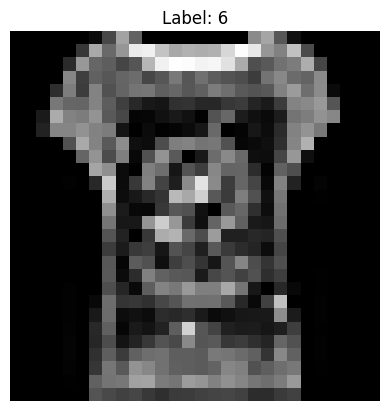

Image size: torch.Size([1, 28, 28])


In [62]:
show_sample(train_dataloader_FashionMNIST, mean=0.5, std=0.5)

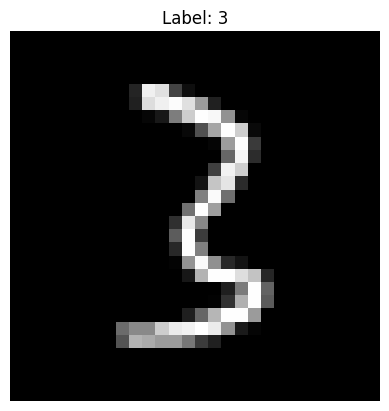

Image size: torch.Size([1, 28, 28])


In [63]:
show_sample(train_dataloader_MNIST, mean=0.5, std=0.5)

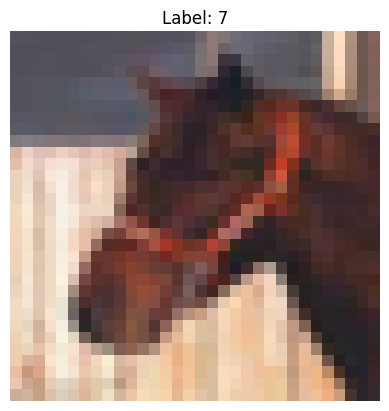

Image size: torch.Size([3, 32, 32])


In [69]:
show_sample(train_dataloader_CIFAR10, mean=0.5, std=0.5)

# First Model

In [71]:
class SCNNB(nn.Module):
    """
    Shallow Convolutional Neural Network with Batch Normalization (SCNNB).

    Architecture (for input 28x28x1 like MNIST):
        - Conv(3x3, 32 filters, padding=1) + BN + ReLU
        - MaxPool(2x2)
        - Conv(3x3, 64 filters, padding=1) + BN + ReLU
        - MaxPool(2x2)
        - Flatten
        - FC(3136 -> 1280) + ReLU
        - Dropout(0.5)
        - FC(1280 -> num_classes)

    Notes:
        - Padding=1 keeps spatial size before pooling.
        - For MNIST (1x28x28) → Flatten=3136 (64*7*7).
        - For CIFAR-10 (3x32x32) → Flatten=4096 (64*8*8).
        - Forward returns raw logits; use nn.CrossEntropyLoss for training.
    """

    def __init__(self, in_channels: int = 1, num_classes: int = 10, input_size: int = 28):
        """
        Initialize the SCNNB model.

        Args:
            in_channels (int): Number of input channels (1 for grayscale, 3 for RGB).
            num_classes (int): Number of output classes.
            input_size (int): Height/Width of the input image (assumed square).
        """
        super().__init__()
        self.input_size  = input_size
        self.in_channels = in_channels
        self.num_classes = num_classes

        # ---- Feature extractor ----
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1   = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2   = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # ---- Classifier ----
        feat_dim   = self._calc_feat_dim()  # Dynamically compute flattened feature dimension
        self.fc1   = nn.Linear(feat_dim, 1280)
        self.drop1 = nn.Dropout(p=0.5)
        self.fc_out= nn.Linear(1280, num_classes)

    def _calc_feat_dim(self) -> int:
        """
        Compute the number of features after the convolution + pooling layers.
        This ensures the fully connected layer is correctly sized for any input.

        Returns:
            int: Flattened feature dimension.
        """
        with torch.no_grad():
            device = next(self.parameters()).device  # Match the device of the model
            tmp = torch.zeros((1, self.in_channels, self.input_size, self.input_size), device=device)
            tmp = self.pool1(F.relu(self.bn1(self.conv1(tmp))))
            tmp = self.pool2(F.relu(self.bn2(self.conv2(tmp))))
            return tmp.numel()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of SCNNB.

        Args:
            x (torch.Tensor): Input tensor of shape (N, C, H, W).

        Returns:
            torch.Tensor: Logits of shape (N, num_classes).
        """
        # ---- Feature extraction ----
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))

        # ---- Classification head ----
        x = torch.flatten(x, start_dim=1)   # Flatten to (N, feat_dim)
        x = F.relu(self.fc1(x))             # Fully connected hidden layer
        x = self.drop1(x)                   # Dropout for regularization
        logits = self.fc_out(x)             # Output logits (no softmax)
        return logits


In [73]:
num_classes_MNIST = len(train_dataset_MNIST.classes)
num_classes_FashionMNIST = len(train_dataset_FashionMNIST.classes)
num_classes_CIFAR10 = len(train_dataset_CIFAR10.classes)

In [76]:
modell = SCNNB(in_channels=1, num_classes=num_classes_MNIST, input_size=28)
model2 = SCNNB(in_channels=1, num_classes=num_classes_FashionMNIST, input_size=28)
model3 = SCNNB(in_channels=3, num_classes=num_classes_CIFAR10, input_size=32)

In [77]:
random_sample = torch.randn((1, 3, 32, 32))
model3(random_sample).shape

torch.Size([1, 10])

# Second Model

In [78]:
class SCNNB_a(nn.Module):
    """
    Shallow Convolutional Neural Network with automatic feature dimension calculation.

    Architecture:
        - Two convolutional layers with ReLU activation and MaxPooling
        - Batch normalization after the second convolution
        - Fully connected classifier with one hidden layer, ReLU, and Dropout
        - Output layer produces logits for classification

    Attributes:
        in_channels (int): Number of channels in the input image (e.g., 1 for grayscale, 3 for RGB)
        image_size (int): Height and width of the square input image
        num_classes (int): Number of output classes for classification
        CNN_block (nn.Sequential): Feature extraction layers (convolutions + activations + pooling)
        classifier (nn.Sequential): Fully connected layers for classification
    """

    def __init__(self, in_channels=1, num_classes=10, image_size=28):
        super().__init__()

        self.in_channels = in_channels
        self.image_size = image_size
        self.num_classes = num_classes

        # Feature extraction block
        self.CNN_block = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fully connected classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=self._calc_feat_dim(), out_features=1280),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=1280, out_features=self.num_classes)
        )

    def _calc_feat_dim(self) -> int:
        """
        Compute the flattened feature dimension after CNN_block.

        This ensures the linear layer is correctly sized for any input image size.

        Returns:
            int: Number of features after flattening the CNN output
        """
        with torch.no_grad():
            device = next(self.parameters()).device  # match the model's device
            tmp = torch.zeros((1, self.in_channels, self.image_size, self.image_size), device=device)
            tmp = self.CNN_block(tmp)
            return tmp.numel()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_channels, image_size, image_size)

        Returns:
            torch.Tensor: Output logits of shape (batch_size, num_classes)
        """
        x = self.CNN_block(x)
        x = self.classifier(x)
        return x

# Third Model

In [80]:
class SCNNB_b(nn.Module):
    """
    Shallow Convolutional Neural Network with automatic feature dimension calculation.

    Architecture:
        - Two convolutional layers with ReLU activation and MaxPooling
        - No Batch Normalization
        - Fully connected classifier with one hidden layer, ReLU, and Dropout
        - Output layer produces logits for classification

    Attributes:
        in_channels (int): Number of channels in the input image (e.g., 1 for grayscale, 3 for RGB)
        image_size (int): Height and width of the square input image
        num_classes (int): Number of output classes for classification
        CNN_block (nn.Sequential): Feature extraction layers (convolutions + activations + pooling)
        classifier (nn.Sequential): Fully connected layers for classification
    """

    def __init__(self, in_channels=1, num_classes=10, image_size=28):
        super().__init__()

        self.in_channels = in_channels
        self.image_size = image_size
        self.num_classes = num_classes

        # Feature extraction block
        self.CNN_block = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fully connected classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=self._calc_feat_dim(), out_features=1280),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=1280, out_features=self.num_classes)
        )

    def _calc_feat_dim(self) -> int:
        """
        Compute the flattened feature dimension after CNN_block.

        This ensures the linear layer is correctly sized for any input image size.

        Returns:
            int: Number of features after flattening the CNN output
        """
        with torch.no_grad():
            device = next(self.parameters()).device  # match the model's device
            tmp = torch.zeros((1, self.in_channels, self.image_size, self.image_size), device=device)
            tmp = self.CNN_block(tmp)
            return tmp.numel()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_channels, image_size, image_size)

        Returns:
            torch.Tensor: Output logits of shape (batch_size, num_classes)
        """
        x = self.CNN_block(x)
        x = self.classifier(x)
        return x